In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing


In [15]:
#Loading the data
df = pd.read_csv('../Project_4/data/model_data_3sec.csv')
df.head()

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock


In [16]:
# remove null values
df.dropna()

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [17]:
df.drop('filename', axis =1)

,Unnamed: 0,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,5940.845102,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,703.804462,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,775.692233,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,887.664889,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,730.638146,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [18]:
df= df[df.columns.drop(list(df.filter(regex='var')))]
df

,Unnamed: 0,filename,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,0,1-000574.mp3,0.381544,0.249562,1957.407156,2048.485350,3585.029860,0.100943,0.000052,0.000068,...,3.665317,-9.748421,2.995540,-4.559982,-2.866331,-8.990259,1.595329,-6.731744,4.317326,Rock
1,2,3-000574.mp3,0.484288,0.253424,2766.351306,2542.654962,5738.018893,0.158905,0.000034,-0.000009,...,2.144493,-9.148898,4.389838,-6.054724,-3.617906,-7.587147,0.172193,-5.444875,1.197923,Rock
2,3,4-000574.mp3,0.425569,0.256628,2908.207536,2703.913526,6252.910907,0.163713,0.000011,-0.000250,...,3.680824,-10.186584,2.543274,-6.967072,-2.589857,-8.594354,-0.271126,-5.592191,-0.288590,Rock
3,4,5-000574.mp3,0.468948,0.265448,2618.340173,2548.584807,5554.903846,0.139870,-0.000049,-0.000192,...,1.791170,-8.883386,-0.221089,-7.038162,-2.001146,-9.315182,-3.543423,-5.760088,2.120627,Rock
4,5,6-000574.mp3,0.392290,0.271375,2767.550410,2663.721676,5940.845102,0.146143,-0.000054,-0.000268,...,-0.329844,-7.563095,4.706252,-5.521904,-4.830932,-8.423706,-0.152457,-4.535352,2.383680,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,6-155066.mp3,0.457243,0.243057,483.225740,875.708502,703.804462,0.019449,0.000010,-0.000006,...,6.133297,4.796370,2.530937,7.792923,14.952423,4.513030,4.309551,9.335838,4.856527,Hip-Hop
71942,79936,7-155066.mp3,0.447897,0.234766,660.113748,1349.132689,775.692233,0.019035,-0.000303,0.000336,...,7.489089,2.066535,1.700049,2.323061,7.850317,1.916095,2.931519,7.093570,5.723800,Hip-Hop
71943,79937,8-155066.mp3,0.444989,0.230987,631.195340,1317.927939,887.664889,0.014461,0.000217,-0.000002,...,6.231783,3.418291,4.423429,6.805921,10.383173,4.368050,4.368290,7.466063,1.732873,Hip-Hop
71944,79938,9-155066.mp3,0.485998,0.233158,616.469137,1299.877639,730.638146,0.018412,-0.000048,0.000080,...,7.796859,3.189467,2.171970,2.082361,6.422930,1.273448,4.322249,9.085366,6.584610,Hip-Hop


In [6]:
test_df = df.loc[(df['label']== 'Pop')|(df['label'] == 'Folk')]

In [7]:
# converting string labels into numbers
le = preprocessing.LabelEncoder()
X = test_df.drop(['label','filename'], axis = 1)
y = le.fit_transform(test_df.label.values)

In [8]:
#Spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.32709611, -1.14857939, -1.72576032, ..., -1.1978009 ,
         0.13673365, -0.43214003],
       [-0.09167976,  0.32387439, -0.26454364, ...,  0.17477938,
         0.00801446, -0.72174332],
       [ 0.84926165,  2.18903444, -0.44313747, ...,  0.80320016,
        -0.27636111,  0.03782666],
       ...,
       [-0.95589061, -1.08027269, -0.11167428, ..., -0.45320846,
        -1.60269073,  0.78545213],
       [ 0.91233359,  0.89086386, -0.52738466, ...,  0.21429558,
         1.50440524,  2.21480833],
       [-1.35917508,  1.15996565, -1.09461176, ...,  0.57087435,
         0.6519461 , -0.23301328]])

k: 1, Train/Test Score: 1.000/0.953
k: 3, Train/Test Score: 0.978/0.939
k: 5, Train/Test Score: 0.961/0.927
k: 7, Train/Test Score: 0.946/0.915
k: 9, Train/Test Score: 0.932/0.901
k: 11, Train/Test Score: 0.918/0.885
k: 13, Train/Test Score: 0.906/0.875
k: 15, Train/Test Score: 0.895/0.867
k: 17, Train/Test Score: 0.883/0.863
k: 19, Train/Test Score: 0.873/0.859


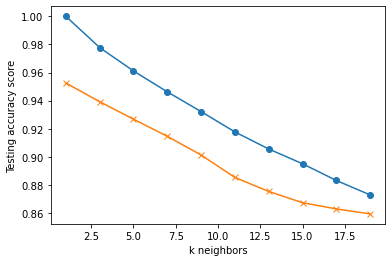

In [10]:
#Generating Model 
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")  
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [13]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Print the score for the test data.
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 train Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=3 test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=3 train Acc: 0.978
k=3 test Accuracy: 0.939


In [ ]:
from joblib import dump, load
dump(knn, 'Model/3_sec-model_knn1.joblib')